# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [40]:
!pip install sastrawi
!pip install git+https://github.com/ariaghora/mpstemmer.git
!pip install python-Levenshtein
!pip install tensorflow scikit-learn matplotlib numpy seaborn

  Cloning https://github.com/ariaghora/mpstemmer.git to /tmp/pip-req-build-kx6udj45
  Running command git clone --filter=blob:none --quiet https://github.com/ariaghora/mpstemmer.git /tmp/pip-req-build-kx6udj45
  Resolved https://github.com/ariaghora/mpstemmer.git to commit 25a5fd923af163a7eac3a5ec976984156ca8fa8b
  Preparing metadata (setup.py) ... done


In [41]:
# import dependency yang dibutuhkan
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from datetime import datetime
import time
import matplotlib.pyplot as plt
import json
from time import sleep
from typing import List, Optional, Tuple
from mpstemmer import MPStemmer

import csv
import requests
from io import StringIO

stemmer = MPStemmer()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [42]:
app_reviews_df = pd.read_csv('ulasan_aplikasi_my_telkomsel.csv')

In [43]:
app_reviews_df.head()

,userName,content,at
0,ZILA,"pas beli kouta error mulu katanya ""tidak dapat...",2025-10-29 11:00:50
1,Ocay,"aplikasi penipu,masa harga paket tertera bisa ...",2025-11-03 23:02:39
2,Anastasya Yulia Ningtyas,Aplikasi gabisa untuk membeli paket karena bes...,2025-08-14 01:51:36
3,Micel Tirayoh,"aplikasi bobrok, ada bug dalam penggunaan 2 no...",2025-10-18 09:11:42
4,Dee salim,"Setiap kali beli kouta, selalu ada kesalahan d...",2025-11-05 17:45:14


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [44]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50148 entries, 0 to 50147
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  50148 non-null  object
 1   content   50148 non-null  object
 2   at        50148 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [45]:
app_reviews_df.isna().sum()

,0
userName,0
content,0
at,0


In [46]:
app_reviews_df.duplicated().sum()

np.int64(0)

In [47]:
app_reviews_df.isnull().sum()

,0
userName,0
content,0
at,0


In [48]:
clean_df = app_reviews_df

In [49]:
# proses pembersihan teks dari karakter atau noise pada data review
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text

def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text):
    if not isinstance(text, str):
        return ''
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [50]:
# proses normalisasi data
response_slangs_dataset = requests.get(
    'https://raw.githubusercontent.com/nasalsabila/kamus-alay/refs/heads/master/colloquial-indonesian-lexicon.csv'
)

slang_df = pd.read_csv(StringIO(response_slangs_dataset.text))

normalized_word_dict = {}

for index, row in slang_df.iterrows():
    key = str(row.iloc[0]).lower().strip()
    value = str(row.iloc[1]).strip()
    normalized_word_dict[key] = value

def word_normalize(text):
    words = text.split()
    fixed_words = []

    for word in words:
        clean_word = word.lower()
        if clean_word in normalized_word_dict:
            fixed_words.append(normalized_word_dict[clean_word])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [51]:
clean_df.head(1)

,userName,content,at
0,ZILA,"pas beli kouta error mulu katanya ""tidak dapat...",2025-10-29 11:00:50


In [52]:
# Text Pre-processing
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(word_normalize)
clean_df['text_stemming'] = clean_df['text_slangwords'].apply(stemmingText)
clean_df['text_tokenizingText'] = clean_df['text_stemming'].apply(tokenizingText)
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [53]:
clean_df.head(1)

,userName,content,at,text_clean,text_casefoldingText,text_slangwords,text_stemming,text_tokenizingText,text_stopword,text_akhir
0,ZILA,"pas beli kouta error mulu katanya ""tidak dapat...",2025-10-29 11:00:50,pas beli kouta error mulu katanya tidak dapat ...,pas beli kouta error mulu katanya tidak dapat ...,pas beli kouta error mulu katanya tidak dapat ...,pas beli kouta error mulu kata tidak dapat mem...,"[pas, beli, kouta, error, mulu, kata, tidak, d...","[pas, beli, kouta, error, mulu, memproses, cek...",pas beli kouta error mulu memproses cek koneks...


In [54]:
# labeling menggunakan lexicon indonesia
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")


In [55]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0

    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        elif word in lexicon_negative:
            score -= abs(lexicon_negative[word])
    if score > 0:
        polarity = 'positif'
    elif score < 0:
        polarity = 'negatif'
    else:
        polarity = 'netral'

    return score, polarity

In [56]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positif    32161
negatif    16278
netral      1709
Name: count, dtype: int64


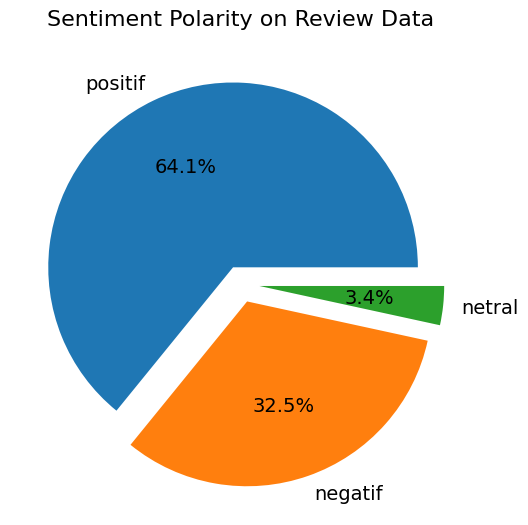

In [57]:
fig, ax = plt.subplots(figsize=(6, 6))
sizes = [count for count in clean_df['polarity'].value_counts()]
labels = list(clean_df['polarity'].value_counts().index)
explode = (0.1, 0.1, 0.1)
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)
plt.show()

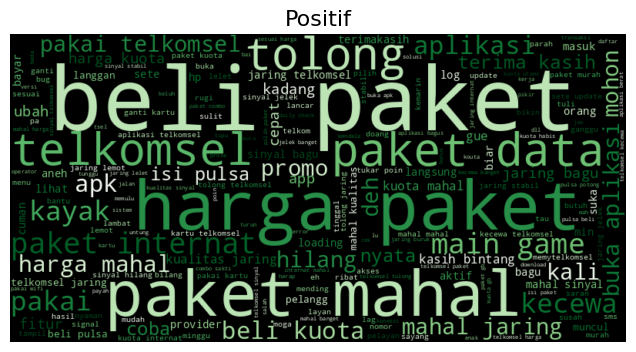

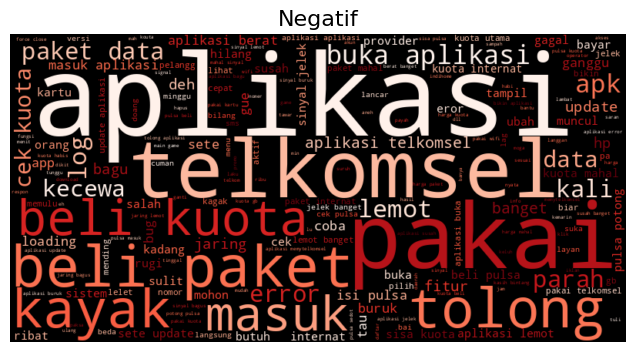

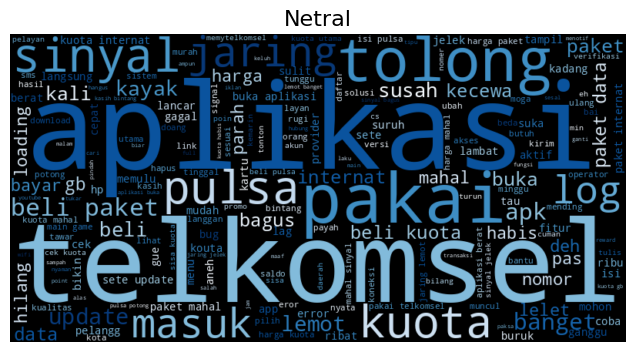

In [58]:
def generate_wordcloud(text, title, color):
    wordcloud = WordCloud(width=800, height=400, colormap=color).generate(text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

postive_wordcloud = " ".join(content for content in clean_df[clean_df["polarity"] == 'positif']['text_akhir'])
negative_wordcloud = " ".join(content for content in clean_df[clean_df["polarity"] == 'negatif']['text_akhir'])
netral_wordcloud = " ".join(content for content in clean_df[clean_df["polarity"] == 'netral']['text_akhir'])
generate_wordcloud(postive_wordcloud, 'Positif', 'Greens')
generate_wordcloud(negative_wordcloud, 'Negatif', 'Reds')
generate_wordcloud(netral_wordcloud, 'Netral', 'Blues')

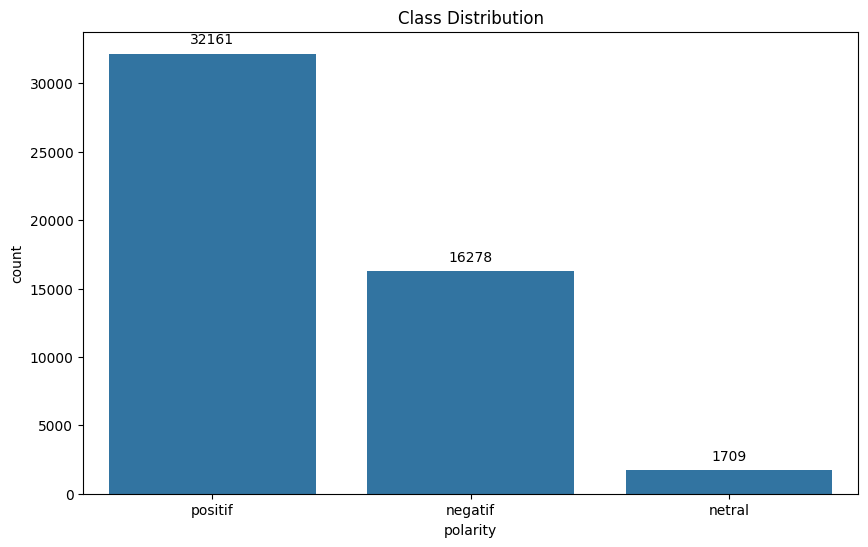

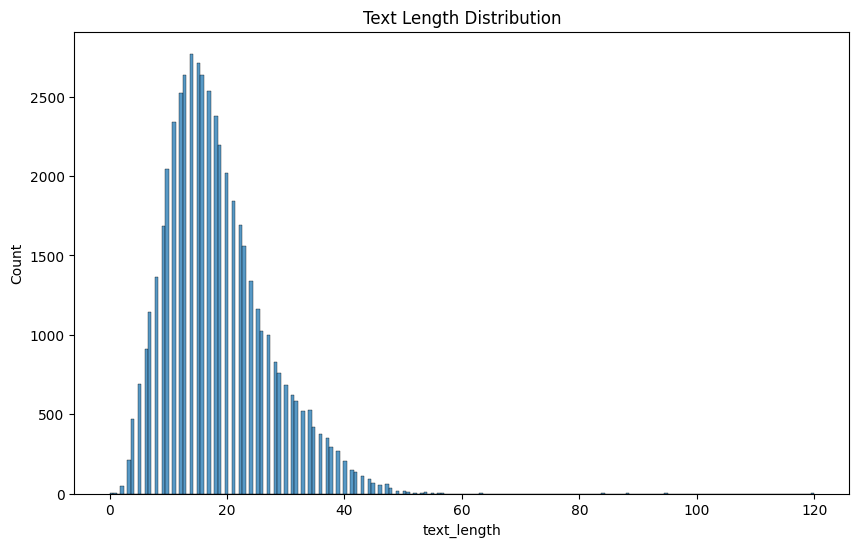

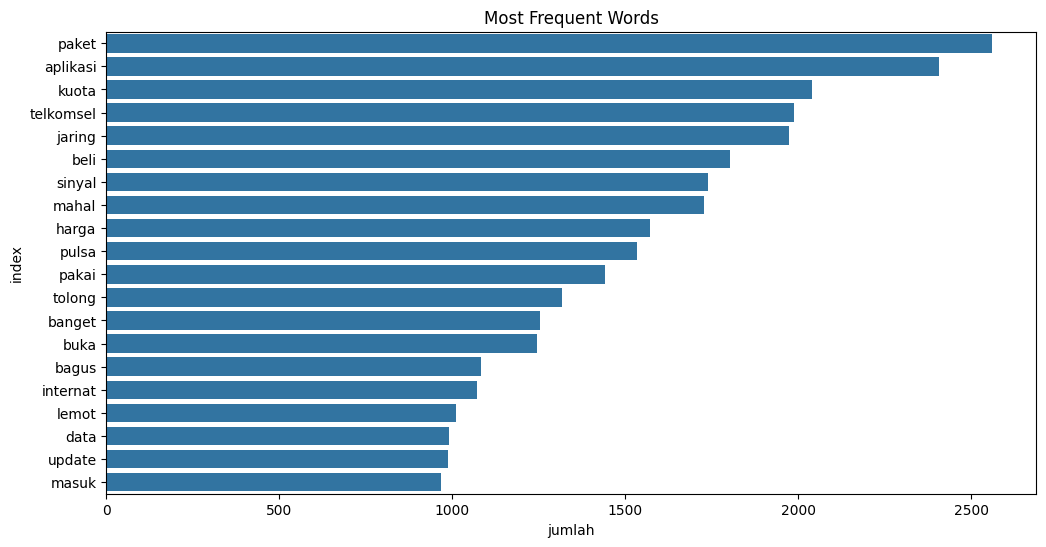

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

plt.figure(figsize=(10, 6))

class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')

for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

plt.figure(figsize=(10, 6))

clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

plt.figure(figsize=(12, 6))

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [60]:
clean_df.head(3)

,userName,content,at,text_clean,text_casefoldingText,text_slangwords,text_stemming,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,text_length
0,ZILA,"pas beli kouta error mulu katanya ""tidak dapat...",2025-10-29 11:00:50,pas beli kouta error mulu katanya tidak dapat ...,pas beli kouta error mulu katanya tidak dapat ...,pas beli kouta error mulu katanya tidak dapat ...,pas beli kouta error mulu kata tidak dapat mem...,"[pas, beli, kouta, error, mulu, kata, tidak, d...","[pas, beli, kouta, error, mulu, memproses, cek...",pas beli kouta error mulu memproses cek koneks...,23,positif,36
1,Ocay,"aplikasi penipu,masa harga paket tertera bisa ...",2025-11-03 23:02:39,aplikasi penipumasa harga paket tertera bisa b...,aplikasi penipumasa harga paket tertera bisa b...,aplikasi penipumasa harga paket tertera bisa b...,aplikasi penipumasa harga paket tera bisa ubah...,"[aplikasi, penipumasa, harga, paket, tera, bis...","[aplikasi, penipumasa, harga, paket, tera, uba...",aplikasi penipumasa harga paket tera ubah pemb...,24,positif,30
2,Anastasya Yulia Ningtyas,Aplikasi gabisa untuk membeli paket karena bes...,2025-08-14 01:51:36,Aplikasi gabisa untuk membeli paket karena bes...,aplikasi gabisa untuk membeli paket karena bes...,aplikasi enggak bisa untuk membeli paket karen...,aplikasi tidak bisa untuk beli paket karena be...,"[aplikasi, tidak, bisa, untuk, beli, paket, ka...","[aplikasi, beli, paket, besok, batas, habis, k...",aplikasi beli paket besok batas habis kuota ma...,3,positif,32


In [61]:
X = clean_df['text_akhir']
y = clean_df['polarity']

In [62]:
tfidf = TfidfVectorizer(max_features=5000, min_df=17, max_df=0.8, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(X)

In [63]:
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
features_df

,abai,abal,abis,abis kuota,acara,account,aco,adaan,adakan,adat,...,youtube lancar,youtube main,youtube pakai,yt,yth,yutub,zaman,zona,zonk,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
# Label Encoder
le = LabelEncoder()
clean_df['label'] = le.fit_transform(clean_df['polarity'])
num_classes = len(le.classes_)

X = clean_df['text_akhir'].astype(str).values
y = clean_df['label'].values

# split data train dan data test
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [65]:
df_tr = pd.DataFrame({'path':x_train,'labels':y_train,'data_type_set':'train'})
df_te = pd.DataFrame({'path':x_test,'labels':y_test,'data_type_set':'test'})

In [66]:
print('train size: ', len(df_tr))
print('test size: ', len(df_te))

train size:  40118
test size:  10030


In [67]:
df_all = pd.concat([df_tr, df_te], ignore_index=True)

print('===================================================== \n')
print(df_all.groupby(['data_type_set', 'labels']).size(), '\n')
print('===================================================== \n')

print(df_all.sample(5))


data_type_set  labels
test           0          3256
               1           342
               2          6432
train          0         13022
               1          1367
               2         25729
dtype: int64 


                                                    path  labels data_type_set
23762               susah buka loading beli kuota proses       2         train
1948   telkomsel gue beli kartu deh pelangg telkomsel...       2         train
34029  susah log loading selesai log banya fitur biki...       0         train
6655   pelayan grapar abepura jelek petugas reservas ...       1         train
18636  aplikasi mt telkomsel update parah darilag sin...       2         train


In [68]:
# generate processed dataset
clean_df.to_csv('ulasan_processed_dataset.csv', index=False)